# Customer Churn Prediction - Data Loading & Initial Exploration

**Project Overview**: Predicting customer churn for a telecommunications company

**Author**: Muhammad Afnan

**Date**: 11 Jun 2025

---

## Objective
This notebook focuses on:
1. Loading the dataset
2. Initial data exploration
3. Basic data quality assessment
4. Understanding data structure and types

---

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 2. Data Loading

In [2]:
# Load the dataset
# Note: Update the path according to your local setup
DATA_PATH = "D:\Machine Learning Projects\Customer Churn Prediction\dataset\Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Dataset loaded successfully")
    print(f"📊 Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ File not found at {DATA_PATH}")
    print("Please update the DATA_PATH variable with the correct path to your dataset")

✅ Dataset loaded successfully
📊 Dataset shape: (7043, 21)


## 3. Initial Data Exploration

In [3]:
# First look at the data
print("📋 First 5 rows of the dataset:")
print("=" * 50)
df.head()

📋 First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dataset information
print("📈 Dataset Information:")
print("=" * 30)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

📈 Dataset Information:
Number of rows: 7,043
Number of columns: 21

Column names:
 1. customerID
 2. gender
 3. SeniorCitizen
 4. Partner
 5. Dependents
 6. tenure
 7. PhoneService
 8. MultipleLines
 9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn


In [5]:
# Data types and memory usage
print("🔍 Data Types and Memory Usage:")
print("=" * 35)
df.info()

🔍 Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBi

## 4. Data Quality Assessment

In [6]:
# Check for missing values
print("🔍 Missing Values Analysis:")
print("=" * 30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ No missing values found in the dataset")

🔍 Missing Values Analysis:
✅ No missing values found in the dataset


In [7]:
# Check for duplicate rows
print("🔍 Duplicate Rows Analysis:")
print("=" * 30)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
else:
    print("✅ No duplicate rows found")

🔍 Duplicate Rows Analysis:
Number of duplicate rows: 0
✅ No duplicate rows found


In [8]:
# Check unique values for each column
print("🔍 Unique Values Analysis:")
print("=" * 30)
unique_values_df = pd.DataFrame({
    'Column': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Data Type': df.dtypes
})

print(unique_values_df.to_string(index=False))

🔍 Unique Values Analysis:
          Column  Unique Values Data Type
      customerID           7043    object
          gender              2    object
   SeniorCitizen              2     int64
         Partner              2    object
      Dependents              2    object
          tenure             73     int64
    PhoneService              2    object
   MultipleLines              3    object
 InternetService              3    object
  OnlineSecurity              3    object
    OnlineBackup              3    object
DeviceProtection              3    object
     TechSupport              3    object
     StreamingTV              3    object
 StreamingMovies              3    object
        Contract              3    object
PaperlessBilling              2    object
   PaymentMethod              4    object
  MonthlyCharges           1585   float64
    TotalCharges           6531    object
           Churn              2    object


## 5. Basic Statistical Summary

In [9]:
# Statistical summary for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("📊 Statistical Summary (Numerical Columns):")
print("=" * 80)
df.describe().T


📊 Statistical Summary (Numerical Columns):


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
# Summary for categorical columns
print("📊 Categorical Columns Analysis:")
print("=" * 35)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n🔸 {col}:")
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"Unique values: {df[col].nunique()}")

📊 Categorical Columns Analysis:

🔸 customerID:
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
Unique values: 7043

🔸 gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values: 2

🔸 Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Unique values: 2

🔸 Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Unique values: 2

🔸 PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Unique values: 2

🔸 MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Unique values: 3

🔸 InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Unique values: 3

🔸 OnlineSecurity:
OnlineSecurity
No             

## 6. Target Variable Analysis

🎯 Target Variable Analysis (Churn):
       Count  Percentage
Churn                   
No      5174       73.46
Yes     1869       26.54


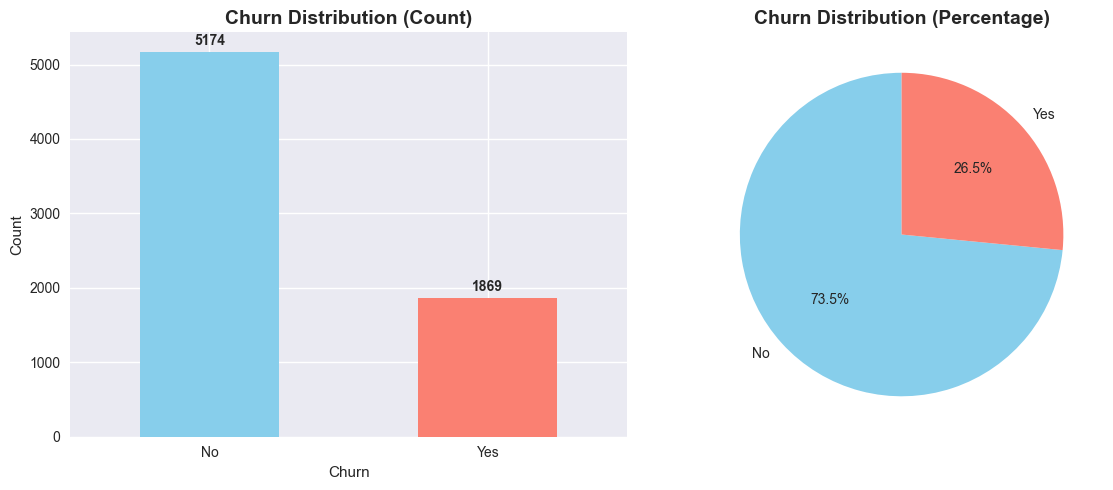


⚠️ Class imbalance detected! Minority class: 26.5%
Consider using sampling techniques during model training.


In [11]:
# Analyze the target variable (Churn)
print("🎯 Target Variable Analysis (Churn):")
print("=" * 40)

if 'Churn' in df.columns:
    churn_counts = df['Churn'].value_counts()
    churn_percentages = df['Churn'].value_counts(normalize=True) * 100
    
    target_summary = pd.DataFrame({
        'Count': churn_counts,
        'Percentage': churn_percentages.round(2)
    })
    
    print(target_summary)
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Count plot
    churn_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
    ax1.set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Churn')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)
    
    # Add value labels on bars
    for i, v in enumerate(churn_counts.values):
        ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    ax2.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
            colors=['skyblue', 'salmon'], startangle=90)
    ax2.set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Class imbalance check
    minority_class_pct = min(churn_percentages)
    if minority_class_pct < 30:
        print(f"\n⚠️ Class imbalance detected! Minority class: {minority_class_pct:.1f}%")
        print("Consider using sampling techniques during model training.")
    else:
        print(f"\n✅ Balanced dataset. Minority class: {minority_class_pct:.1f}%")
else:
    print("❌ 'Churn' column not found in the dataset")

## 7. Data Cleaning

In [12]:
# Clean TotalCharges column
print("🧹 Cleaning TotalCharges column:")
print("=" * 35)
l1= []
l2 = []
for i in (df['TotalCharges']):
    length = len(i.split())
    l1.append(length)
for i in range(len(l1)):
    if l1[i] != 1:
        l2.append(i)
for i in l2:
    df.loc[i,'TotalCharges'] = df.loc[(i-1),'TotalCharges']
df['TotalCharges'] = df['TotalCharges'].astype(float)
print(f"✅ TotalCharges cleaning completed")

🧹 Cleaning TotalCharges column:
✅ TotalCharges cleaning completed


In [13]:
# Create a copy for processing
df_clean = df.copy()
print(f"📋 Working with a copy of the data")

📋 Working with a copy of the data


In [14]:
# Remove CustomerID as it's not useful for prediction
print("🗑️ Removing CustomerID column:")
print("=" * 30)

if 'customerID' in df_clean.columns:
    print(f"CustomerID samples: {df_clean['customerID'].head().tolist()}")
    df_clean = df_clean.drop(columns=['customerID'])
    print("✅ CustomerID column removed")
else:
    print("ℹ️ CustomerID column not found")

print(f"New dataset shape: {df_clean.shape}")

🗑️ Removing CustomerID column:
CustomerID samples: ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU']
✅ CustomerID column removed
New dataset shape: (7043, 20)


## 8. Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

text_data_features = []
for i in list(df_clean.columns):
    if i not in list(df.describe().columns):
        text_data_features.append(i)
print("Label Encoder Transformation")

for i in text_data_features:
    df_clean[i] = le.fit_transform(df_clean[i])
    print(i, ' : ',df_clean[i].unique(),' = ' ,le.inverse_transform(df_clean[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


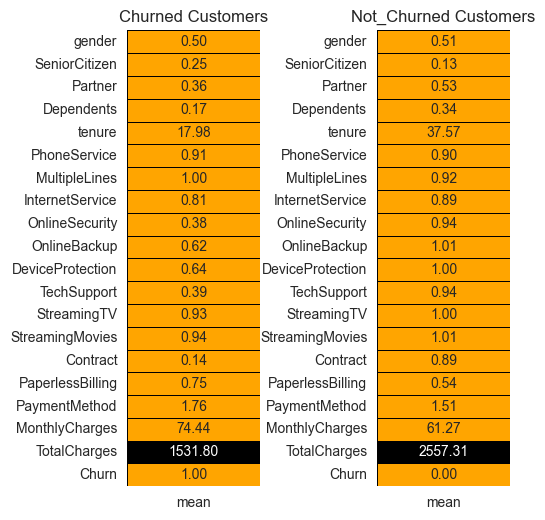

In [16]:
colors = ['Orange', "Black"]
churn = df_clean[df_clean['Churn']==1].describe().T
not_churn = df_clean[df_clean['Churn']==0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');
fig.tight_layout(pad = 0)

## 7. Summary & Next Steps

In [18]:
print("📋 DATA EXPLORATION SUMMARY")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Numerical Columns: {len(numerical_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")

if 'Churn' in df.columns:
    churn_rate = (df['Churn'] == 'Yes').mean() * 100
    print(f"Churn Rate: {churn_rate:.1f}%")

print("\n📝 NEXT STEPS:")
print("=" * 15)
print("1. ✅ Data Loading & Exploration & Cleaning - COMPLETED")
print("2. 🔄 Exploratory Data Analysis (EDA)")
print("3. 🔄 Feature Engineering")

# Save the loaded data for next notebook
print("\n💾 Saving processed data for next notebook...")
df.to_csv('Telco-Customer-Churn.csv', index=False)
print("✅ Data saved to 'Telco-Customer-Churn.csv'")
df_clean.to_csv('Telco-Customer-Churn_Cleaned.csv', index=False)
print("✅ Data saved to 'Telco-Customer-Churn_Cleaned.csv'")

📋 DATA EXPLORATION SUMMARY
Dataset Shape: (7043, 21)
Missing Values: 0
Duplicate Rows: 0
Numerical Columns: 3
Categorical Columns: 18
Churn Rate: 26.5%

📝 NEXT STEPS:
1. ✅ Data Loading & Exploration & Cleaning - COMPLETED
2. 🔄 Exploratory Data Analysis (EDA)
3. 🔄 Feature Engineering

💾 Saving processed data for next notebook...
✅ Data saved to 'Telco-Customer-Churn.csv'
✅ Data saved to 'Telco-Customer-Churn_Cleaned.csv'
